# UIP puzzle - Japan-U.S.

In [2]:
# Import libraries
!pip install pandas openpyxl
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

## Nominal FX data

 Japanese Yen to U.S. Dollar Spot Exchange Rate (DEXJPUS) - https://fred.stlouisfed.org/series/DEXJPUS


In [5]:
# !!! - Careful FRED data saved in weird format! Need to save locally to .xlsx

# Read nominal FX (US for EUR) data
Nominal_JPYUSD_monthly = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/NominalFX_JPYforUSD_monthly_FRED.xlsx',
                             skiprows = 10)

# Rename columns
Nominal_JPYUSD_monthly.columns = ['Date', 'Nominal_FX']

# Convert the date column to datetime format
Nominal_JPYUSD_monthly['Date'] = pd.to_datetime(Nominal_JPYUSD_monthly['Date'])

# Set the date column as the index
Nominal_JPYUSD_monthly.set_index('Date', inplace = True)

# Take inverse to find USD for CAD
# Nominal_JPYUSD_monthly['Nominal_FX'] = 1 / Nominal_JPYUSD_monthly['Nominal_FX']

Nominal_JPYUSD_monthly.head()

,Nominal_FX
Date,
1990-01-01,144.981905
1990-02-01,145.693158
1990-03-01,153.308182
1990-04-01,158.458571
1990-05-01,154.044091


<Axes: xlabel='Date'>

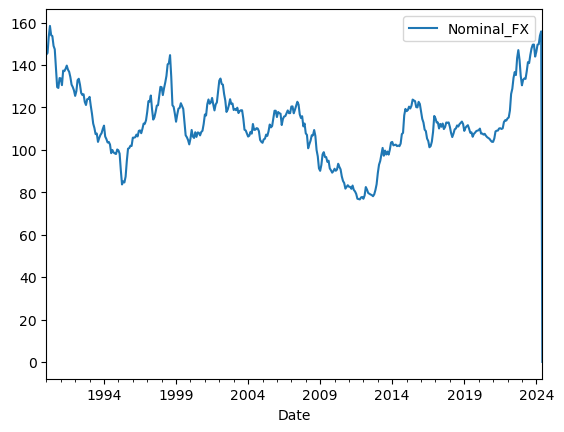

In [6]:
Nominal_JPYUSD_monthly.plot()

## Japan 3-month interest rate data

Interest Rates: 3-Month or 90-Day Rates and Yields: Interbank Rates: Total for Japan (IR3TIB01JPM156N) - https://fred.stlouisfed.org/series/IR3TIB01JPM156N 

In [9]:
# !!! - Careful FRED data saved in weird format! Need to save locally to .xlsx

# Read nominal FX (US for EUR) data
JPN_3m_monthly = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/3Month_JPN_monthly_FRED.xlsx',
                             skiprows = 10)

# Rename columns
JPN_3m_monthly.columns = ['Date', 'JPN_3m']

# Convert date column to datetime format
JPN_3m_monthly['Date'] = pd.to_datetime(JPN_3m_monthly['Date'])

# Set the date column as the index
JPN_3m_monthly.set_index('Date', inplace = True)

JPN_3m_monthly.head()


,JPN_3m
Date,
2002-04-01,0.10
2002-05-01,0.08
2002-06-01,0.09
2002-07-01,0.09
2002-08-01,0.07


<Axes: xlabel='Date'>

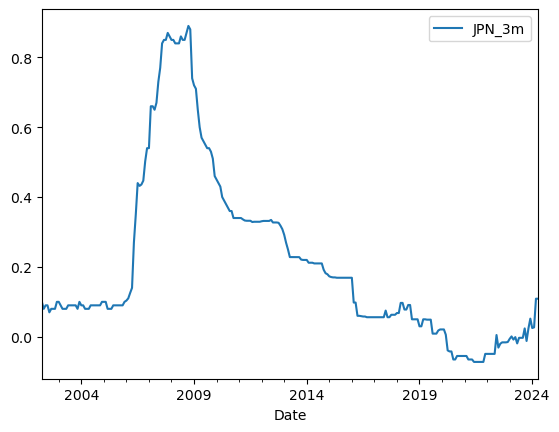

In [10]:
JPN_3m_monthly.plot()

## U.S. interest rate data

3-Month Treasury Bill Secondary Market Rate, Discount Basis (TB3MS) - https://fred.stlouisfed.org/series/TB3MS

In [13]:
# Careful FRED data saved in weird format! Need to save locally to xlsx

# Read nominal FX (US for EUR) data
UST_3m_monthly = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/3Month_UST_monthly_FRED.xlsx',
                             skiprows = 10)

# Rename columns
UST_3m_monthly.columns = ['Date', 'UST_3m']

# Convert date column to datetime format
UST_3m_monthly['Date'] = pd.to_datetime(UST_3m_monthly['Date'])

# Set the date column as the index
UST_3m_monthly.set_index('Date', inplace = True)

UST_3m_monthly.tail()

,UST_3m
Date,
2024-01-01,5.22
2024-02-01,5.24
2024-03-01,5.24
2024-04-01,5.24
2024-05-01,5.25


<Axes: xlabel='Date'>

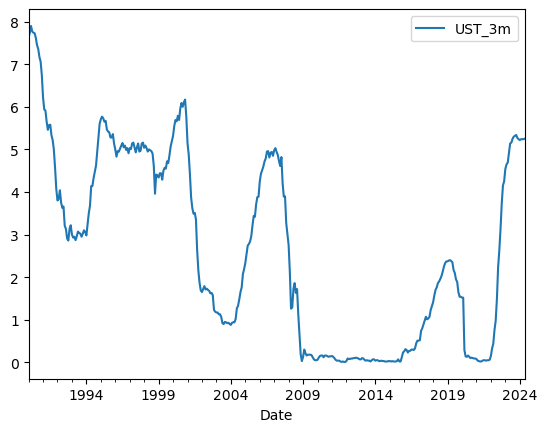

In [14]:
UST_3m_monthly.plot()

Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis (DGS1) - https://fred.stlouisfed.org/series/DGS1

In [16]:
# # Careful FRED data saved in weird format! Need to save locally to xlsx

# # Read nominal FX (US for EUR) data
# UST_1Y_monthly = pd.read_excel('/Users/virginiaballesteroskisielewska/Documents/MPhil Economics - Y1/RA /Code/202406_FX_Puzzles_Replication/Data/1Y_Yield_US_monthly_FRED.xlsx',
#                              skiprows = 10)

# # Rename columns
# UST_1Y_monthly.columns = ['Date', 'UST_1Y']

# # Convert date column to datetime format
# UST_1Y_monthly['Date'] = pd.to_datetime(UST_1Y_monthly['Date'])

# # Set the date column as the index
# UST_1Y_monthly.set_index('Date', inplace = True)

# UST_1Y_monthly.head()


In [17]:
# UST_1Y_monthly.plot()

## Regressions

In [19]:
# Merge dataset

# Concatenate all DataFrames along the columns and join them on the Date index
merged_df = pd.concat([JPN_3m_monthly, UST_3m_monthly, Nominal_JPYUSD_monthly], axis=1, join='outer')

# Display the first few rows of the merged DataFrame
merged_df.head()

,JPN_3m,UST_3m,Nominal_FX
Date,,,
1990-01-01,NaN,7.64,144.981905
1990-02-01,NaN,7.74,145.693158
1990-03-01,NaN,7.90,153.308182
1990-04-01,NaN,7.77,158.458571
1990-05-01,NaN,7.74,154.044091


## 3-month

In [34]:
# Log transform the relevant columns
merged_df['log_Nominal_FX'] = np.log(merged_df['Nominal_FX'])

# Calculate the future spot exchange rate (3 months ahead)
merged_df['log_Nominal_FX_3m_ahead'] = merged_df['log_Nominal_FX'].shift(-3)

# Calculate the change in exchange rate (3 months ahead)
merged_df['change_log_FX'] = merged_df['log_Nominal_FX_3m_ahead'] - merged_df['log_Nominal_FX']

# Calculate the interest rate differential
merged_df['interest_rate_diff'] = (merged_df['UST_3m'] - merged_df['JPN_3m'])
# # merged_df['interest_rate_diff'].min()  # Check min value to adjust log transformation
merged_df['log_interest_rate_diff'] = np.log(merged_df['interest_rate_diff'] + 0.72)

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [67]:
# Function to make multiple plots
def plot_interest_rate_diff_vs_fx(df, start_date=None, end_date=None, title=None):
    # Filter DataFrame by date range if provided
    if start_date and end_date:
        mask = (df.index >= start_date) & (df.index <= end_date)
        df = df.loc[mask]

    # Scatter plot of 'interest_rate_diff' vs. 'Nominal_FX'
    plt.figure(figsize=(10, 6))
    plt.scatter(df['log_interest_rate_diff'], df['log_Nominal_FX_3m_ahead'], alpha=0.5, edgecolors='w', linewidth=0.5)

    # Add a linear trend line
    slope, intercept, r_value, p_value, std_err = linregress(df['log_interest_rate_diff'], df['log_Nominal_FX_3m_ahead'])
    line = slope * df['log_interest_rate_diff'] + intercept
    plt.plot(df['log_interest_rate_diff'], line, color='brown')

    # Add titles and labels
    plt.title(title)
    plt.xlabel('3-month USD-JPY interest differential')
    plt.ylabel('3-month ex post depreciation')

    # Show the plot
    plt.grid(True)
    plt.show()

In [69]:
merged_df.head()

,JPN_3m,UST_3m,Nominal_FX,log_Nominal_FX,log_Nominal_FX_3m_ahead,change_log_FX,interest_rate_diff,log_interest_rate_diff
Date,,,,,,,,
1990-01-01,NaN,7.64,144.981905,4.976609,5.065493,0.088884,NaN,NaN
1990-02-01,NaN,7.74,145.693158,4.981503,5.037239,0.055736,NaN,NaN
1990-03-01,NaN,7.90,153.308182,5.032450,5.034975,0.002525,NaN,NaN
1990-04-01,NaN,7.77,158.458571,5.065493,5.004212,-0.061282,NaN,NaN
1990-05-01,NaN,7.74,154.044091,5.037239,4.993563,-0.043676,NaN,NaN


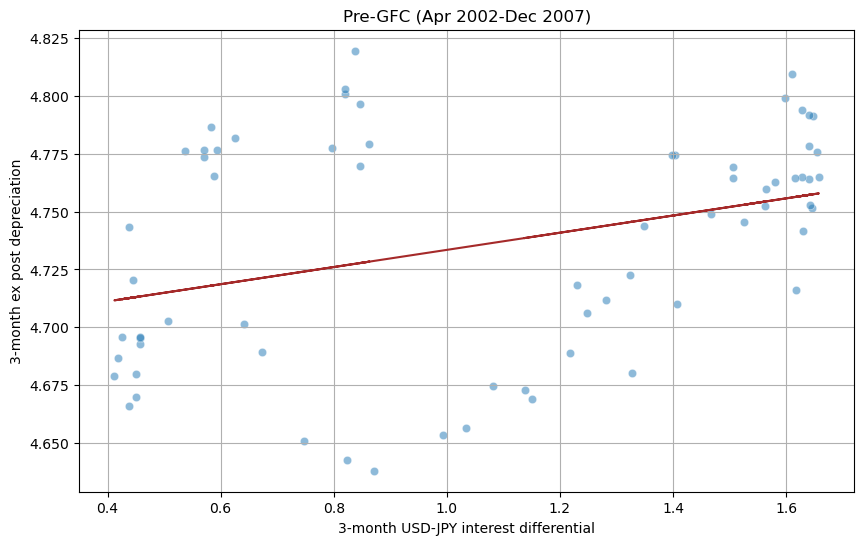

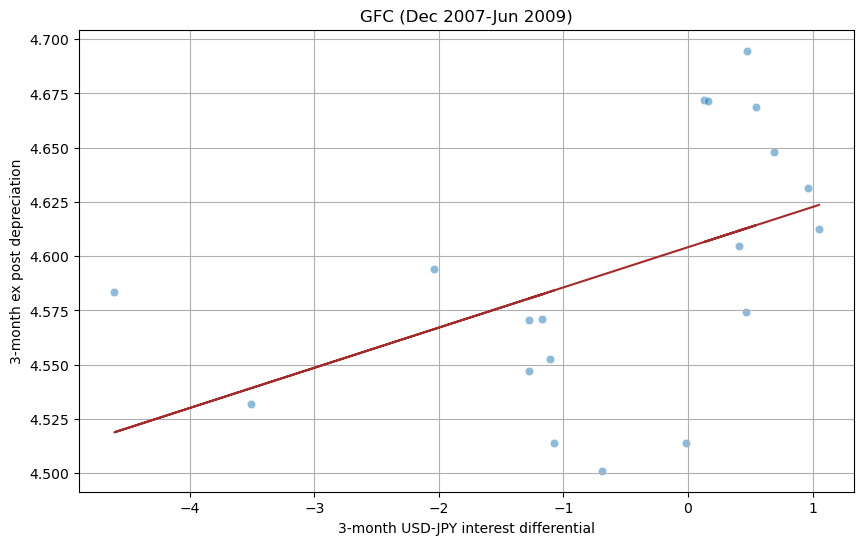

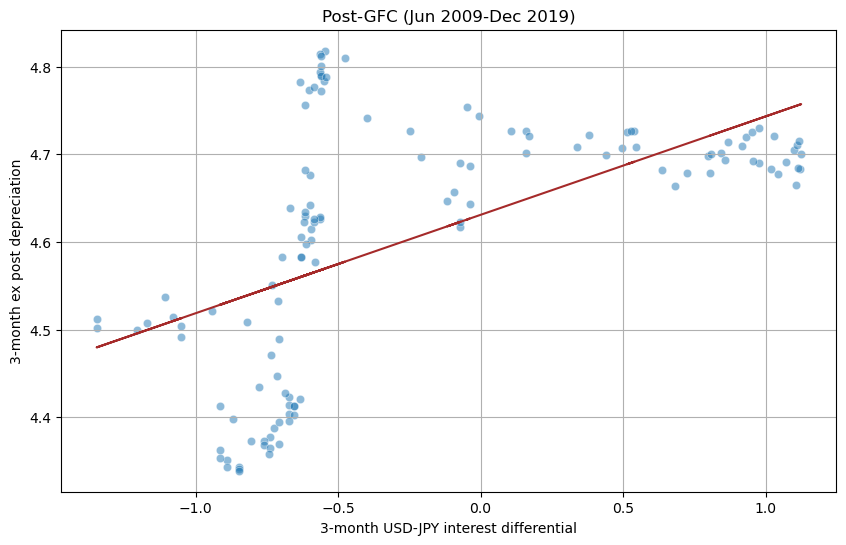

In [71]:
# Define the date ranges and titles
date_ranges = [
    ('2002-04-01', '2007-11-01'), # Start of pre-GFC date will depend on how far back the data goes
    ('2007-12-01', '2009-06-01'),
    ('2009-06-01', '2019-12-01')
]

# Titles for each period
titles = [
    "Pre-GFC (Apr 2002-Dec 2007)",
    "GFC (Dec 2007-Jun 2009)",
    "Post-GFC (Jun 2009-Dec 2019)"
]

# Plot for each date range
for (start_date, end_date), title in zip(date_ranges, titles):
    plot_interest_rate_diff_vs_fx(merged_df, start_date, end_date, title)

In [38]:
# # Function to plot data with optional date range
# def plot_interest_rate_diff_vs_fx(df, start_date=None, end_date=None):
#     # Filter DataFrame by date range if provided
#     if start_date and end_date:
#         mask = (df.index >= start_date) & (df.index <= end_date)
#         df = df.loc[mask]

#     # Scatter plot of 'interest_rate_diff' vs. 'Nominal_FX'
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df['log_interest_rate_diff'], df['log_Nominal_FX_3m_ahead'], alpha=0.5, edgecolors='w', linewidth=0.5)

#     # Add a linear trend line
#     slope, intercept, r_value, p_value, std_err = linregress(df['log_interest_rate_diff'], df['log_Nominal_FX_3m_ahead'])
#     line = slope * df['log_interest_rate_diff'] + intercept
#     plt.plot(df['log_interest_rate_diff'], line, color='brown')

#     # Add titles and labels
#     plt.title('3-month ex post depreciation vs. 3-month US-euro area interest differential')
#     plt.xlabel('3-month US-euro area interest differential')
#     plt.ylabel('3-month ex post depreciation')

#     # Show the plot
#     plt.grid(True)
#     plt.show()

In [39]:
# # Example usage: Plot data for the year 2000
# plot_interest_rate_diff_vs_fx(merged_df, start_date='2007-09-01', end_date='2008-12-01')

In [40]:
def perform_regression_with_robust_se(merged_df, start_date, end_date):
    """
    Perform regression analysis on the given DataFrame within the specified date range.
    
    Parameters:
    merged_df (pd.DataFrame): The DataFrame containing the data.
    start_date (str): The start date for filtering the DataFrame (format 'YYYY-MM-DD').
    end_date (str): The end date for filtering the DataFrame (format 'YYYY-MM-DD').
    
    Returns:
    tuple: The intercept, coefficient of log_interest_rate_diff, and the fitted model.
    """
    # Drop NaN values that result from shifting
    merged_df = merged_df.dropna(subset=['change_log_FX', 'log_interest_rate_diff'])

    # Filter the DataFrame for the desired date range
    filtered_df = merged_df.loc[start_date:end_date]

    # Define the dependent and independent variables
    X = filtered_df['log_interest_rate_diff']
    y = filtered_df['change_log_FX']

    # Add a constant term for the intercept
    X = sm.add_constant(X)

    # Perform the regression with robust standard errors
    model = sm.OLS(y, X).fit(cov_type='HC1')

    # Return the intercept, coefficient of log_interest_rate_diff, and the model
    return model.params['const'], model.params['log_interest_rate_diff'], model

In [73]:
def plot_coefficients_and_intercepts(merged_df, date_ranges, custom_labels):
    intercepts = []
    coefficients = []
    date_labels = []

    for start_date, end_date in date_ranges:
        intercept, coefficient, model = perform_regression_with_robust_se(merged_df, start_date, end_date)
        intercepts.append(intercept)
        coefficients.append(coefficient)
        date_labels.append(f"{start_date} to {end_date}")

        # Print the regression results
        print(f"Regression results for {start_date} to {end_date}:")
        print(model.summary())
        print("\n" + "="*80 + "\n")
    
    # Plot the intercepts and coefficients in a bar chart
    x = range(len(date_ranges))
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot intercepts with a specific color
    bars1 = ax.bar(x, intercepts, width, label='Intercept', color='blue')

    # Plot coefficients with a specific color
    bars2 = ax.bar([p + width for p in x], coefficients, width, label='log_interest_rate_diff', color='red')

    # Adding labels
    ax.set_xlabel('Date Range')
    ax.set_ylabel('Value')
    ax.set_title('Intercept and log_interest_rate_diff estimated coefficient')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(custom_labels, rotation=45, ha='right')
    ax.legend()

    # Show plot with tight layout
    plt.tight_layout()
    plt.show()


Regression results for 2002-04-01 to 2007-12-01:
                            OLS Regression Results                            
Dep. Variable:          change_log_FX   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.527
Date:                Sat, 29 Jun 2024   Prob (F-statistic):             0.0370
Time:                        18:54:04   Log-Likelihood:                 128.14
No. Observations:                  69   AIC:                            -252.3
Df Residuals:                      67   BIC:                            -247.8
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


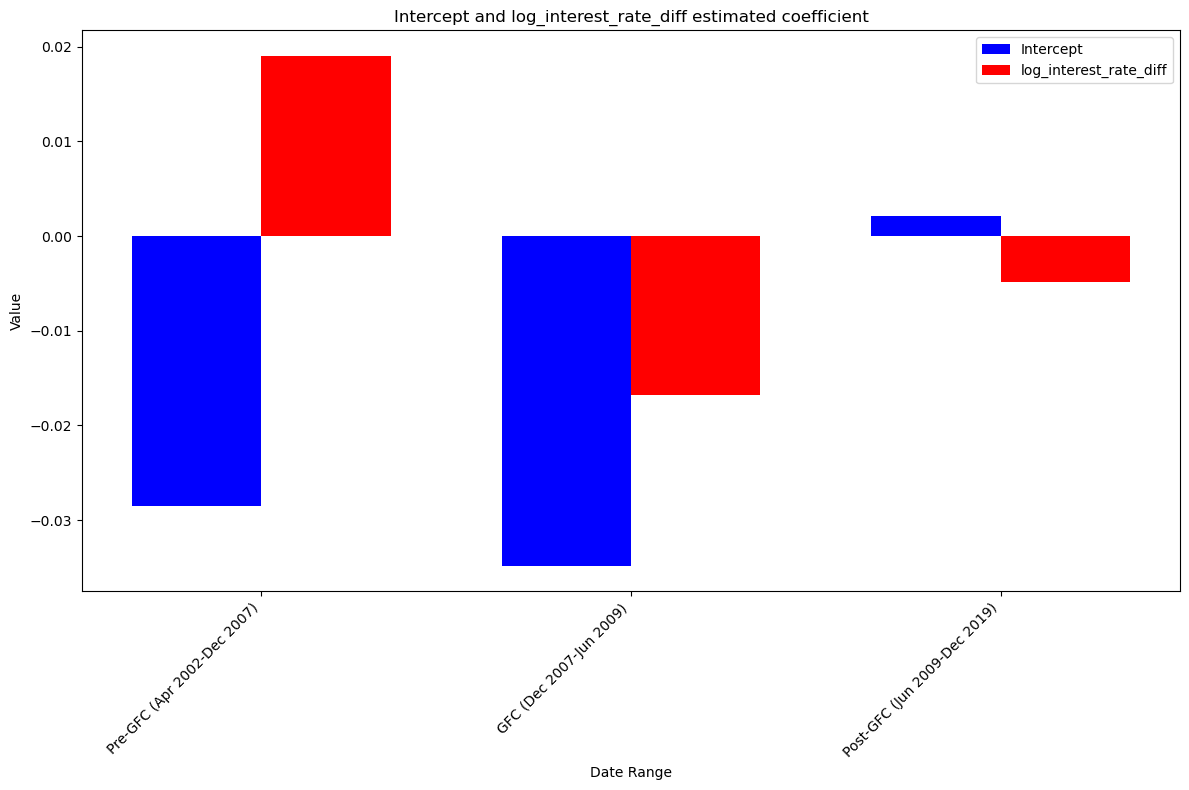

In [75]:
# Date ranges following NBER classification of recession

custom_lables = ["Pre-GFC (Apr 2002-Dec 2007)", "GFC (Dec 2007-Jun 2009)", "Post-GFC (Jun 2009-Dec 2019)"]
date_ranges = [
    ('2002-04-01', '2007-12-01'), # Start of pre-GFC date range will depend on data availability
    ('2007-12-01', '2009-06-01'),
    ('2009-06-01', '2019-12-01')
]

plot_coefficients_and_intercepts(merged_df, date_ranges, custom_lables)

## 1-year

In [44]:
# # Log transform the relevant columns
# merged_df['log_Nominal_FX'] = np.log(merged_df['Nominal_FX'])
# # merged_df['log_UST_1Y'] = np.log(merged_df['UST_1Y'])
# # merged_df['Euro_1Y'].min() # Check min value to adjust log transformation
# merged_df['log_Euro_1Y'] = np.log(merged_df['Euro_1Y'] + 0.85)

# # Calculate the future spot exchange rate (1 year ahead)
# merged_df['log_Nominal_FX_1Y_ahead'] = merged_df['log_Nominal_FX'].shift(-12)

# # Calculate the change in exchange rate (1 year ahead)
# merged_df['change_log_FX'] = merged_df['log_Nominal_FX_1Y_ahead'] - merged_df['log_Nominal_FX']

# # Calculate the interest rate differential, adding min(=5.5) to allow log transformation
# merged_df['interest_rate_diff'] = (merged_df['UST_1Y'] - merged_df['Euro_1Y'])
# # merged_df['interest_rate_diff'].min()
# merged_df['log_interest_rate_diff'] = np.log(merged_df['interest_rate_diff'] + 2.2)

In [45]:
# # Function to make one plot
# def plot_interest_rate_diff_vs_fx(df, start_date=None, end_date=None):
#     # Filter DataFrame by date range if provided
#     if start_date and end_date:
#         mask = (df.index >= start_date) & (df.index <= end_date)
#         df = df.loc[mask]

#     # Scatter plot of 'interest_rate_diff' vs. 'Nominal_FX'
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df['log_interest_rate_diff'], df['log_Nominal_FX_1Y_ahead'], alpha=0.5, edgecolors='w', linewidth=0.5)

#     # Add a linear trend line
#     slope, intercept, r_value, p_value, std_err = linregress(df['log_interest_rate_diff'], df['log_Nominal_FX_1Y_ahead'])
#     line = slope * df['log_interest_rate_diff'] + intercept
#     plt.plot(df['log_interest_rate_diff'], line, color='brown')

#     # Add titles and labels
#     plt.title('1-year ex post depreciation vs. 1-year US-euro area interest differential')
#     plt.xlabel('1-year US-euro area interest differential')
#     plt.ylabel('1-year ex post depreciation')

#     # Show the plot
#     plt.grid(True)
#     plt.show()

In [46]:
# # Function to make multiple plots
# def plot_interest_rate_diff_vs_fx(df, start_date=None, end_date=None, title=None):
#     # Filter DataFrame by date range if provided
#     if start_date and end_date:
#         mask = (df.index >= start_date) & (df.index <= end_date)
#         df = df.loc[mask]

#     # Scatter plot of 'interest_rate_diff' vs. 'Nominal_FX'
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df['log_interest_rate_diff'], df['log_Nominal_FX_1Y_ahead'], alpha=0.5, edgecolors='w', linewidth=0.5)

#     # Add a linear trend line
#     slope, intercept, r_value, p_value, std_err = linregress(df['log_interest_rate_diff'], df['log_Nominal_FX_1Y_ahead'])
#     line = slope * df['log_interest_rate_diff'] + intercept
#     plt.plot(df['log_interest_rate_diff'], line, color='brown')

#     # Add titles and labels
#     plt.title('1-year ex post depreciation vs. 1-year US-euro area interest differential')
#     plt.xlabel('1-year US-euro area interest differential')
#     plt.ylabel('1-year ex post depreciation')

#     # Show the plot
#     plt.grid(True)
#     plt.show()

In [47]:
# # Define the date ranges and titles
# date_ranges = [
#     ('2004-09-01', '2007-11-01'), # Start of pre-GFC date range will depend on data availability
#     ('2007-12-01', '2009-06-01'),
#     ('2009-06-01', '2019-12-01')
# ]

# # Titles for each period
# titles = [
#     "Pre-GFC (Sep 2004-Dec 2007)",
#     "GFC (Dec 2007-Jun 2009)",
#     "Post-GFC (Jun 2009-Dec 2019)"
# ]

# # Plot for each date range
# for (start_date, end_date), title in zip(date_ranges, titles):
#     plot_interest_rate_diff_vs_fx(merged_df, start_date, end_date, title)

In [48]:
# def perform_regression_with_robust_se(merged_df, start_date, end_date):
#     """
#     Perform regression analysis on the given DataFrame within the specified date range.
    
#     Parameters:
#     merged_df (pd.DataFrame): The DataFrame containing the data.
#     start_date (str): The start date for filtering the DataFrame (format 'YYYY-MM-DD').
#     end_date (str): The end date for filtering the DataFrame (format 'YYYY-MM-DD').
    
#     Returns:
#     tuple: The intercept, coefficient of log_interest_rate_diff, and the fitted model.
#     """
#     # Drop NaN values that result from shifting
#     merged_df = merged_df.dropna(subset=['change_log_FX', 'log_interest_rate_diff'])

#     # Filter the DataFrame for the desired date range
#     filtered_df = merged_df.loc[start_date:end_date]

#     # Define the dependent and independent variables
#     X = filtered_df['log_interest_rate_diff']
#     y = filtered_df['change_log_FX']

#     # Add a constant term for the intercept
#     X = sm.add_constant(X)

#     # Perform the regression with robust standard errors
#     model = sm.OLS(y, X).fit(cov_type='HC1')

#     # Return the intercept, coefficient of log_interest_rate_diff, and the model
#     return model.params['const'], model.params['log_interest_rate_diff'], model

In [49]:
# def plot_coefficients_and_intercepts(merged_df, date_ranges, custom_labels):
#     intercepts = []
#     coefficients = []
#     date_labels = []

#     for start_date, end_date in date_ranges:
#         intercept, coefficient, model = perform_regression_with_robust_se(merged_df, start_date, end_date)
#         intercepts.append(intercept)
#         coefficients.append(coefficient)
#         date_labels.append(f"{start_date} to {end_date}")

#         # Print the regression results
#         print(f"Regression results for {start_date} to {end_date}:")
#         print(model.summary())
#         print("\n" + "="*80 + "\n")
    
#     # Plot the intercepts and coefficients in a bar chart
#     x = range(len(date_ranges))
#     width = 0.35  # Width of the bars

#     fig, ax = plt.subplots(figsize=(12, 8))

#     # Plot intercepts with a specific color
#     bars1 = ax.bar(x, intercepts, width, label='Intercept', color='blue')

#     # Plot coefficients with a specific color
#     bars2 = ax.bar([p + width for p in x], coefficients, width, label='log_interest_rate_diff Coefficient', color='red')

#     # Adding labels
#     ax.set_xlabel('Date Range')
#     ax.set_ylabel('Value')
#     ax.set_title('Intercept and log_interest_rate_diff Coefficient over Different Date Ranges')
#     ax.set_xticks([p + width/2 for p in x])
#     ax.set_xticklabels(custom_labels, rotation=45, ha='right')
#     ax.legend()

#     # Show plot with tight layout
#     plt.tight_layout()
#     plt.show()


In [50]:
# # Date ranges following NBER classification of recession

# custom_lables = ["Pre-GFC (Sep 2004-Dec 2007)", "GFC (Dec 2007-Jun 2009)", "Post-GFC (Jun 2009-Dec 2019)"]
# date_ranges = [
#     ('2004-09-01', '2007-12-01'),
#     ('2007-12-01', '2009-06-01'),
#     ('2009-06-01', '2019-12-01')
# ]

# plot_coefficients_and_intercepts(merged_df, date_ranges, custom_lables)